#Machine Learning Models: Lasso Regression

##Import packages and mount drive

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFdr,f_regression
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr,spearmanr
import time

In [ ]:
from google.colab import drive # this is how I loaded the data in today. run this code and create a shortcut in your google drive for this folder 
drive.mount('/content/drive')

Mounted at /content/drive


##Import median imputed data

In [ ]:
train1 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/training_impute_median_norm.csv")
test1 =  pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/testing_impute_median_norm.csv") 
valid1 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/validation_impute_median_norm.csv") 

In [ ]:
print(train1.shape)
print(train1.head())
print(test1.shape)
print(test1.head())
print(valid1.shape)
print(valid1.head())

(1710, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      553099                 -0.887366  ...            0            0
1        8471                 -0.954460  ...            1            0
2      534458                 -0.521771  ...            0            0
3      225766                 -0.454279  ...            1            0
4      161271                 -0.457694  ...            0            0

[5 rows x 327 columns]
(428, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      312890                  0.313780  ...            1            0
1       38898                 -0.187881  ...            0            0
2      441498                  0.127885  ...            0            0
3      701123                 -1.014556  ...            1            0
4      230653                 -0.111490  ...            0            0

[5 rows x 327 columns]
(1053, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_o

##Create training and testing matrices

In [ ]:
X_train1=train1.iloc[:,2:]
y_train1=train1.iloc[:,1]
print(X_train1.shape)
print(y_train1.shape)

(1710, 325)
(1710,)


In [ ]:
y_train1.describe()

count    1710.000000
mean       -0.854674
std         0.956411
min        -8.056765
25%        -1.245615
50%        -0.703855
75%        -0.255770
max         7.609167
Name: slope_following_9_months, dtype: float64

In [ ]:
X_test1=test1.iloc[:,2:]
y_test1=test1.iloc[:,1]
print(X_test1.shape)
print(y_test1.shape)

(428, 325)
(428,)


In [ ]:
y_test1.describe()

count    428.000000
mean      -0.832762
std        0.842031
min       -6.087333
25%       -1.222548
50%       -0.715107
75%       -0.303395
max        3.261071
Name: slope_following_9_months, dtype: float64

In [ ]:
X_valid1=valid1.iloc[:,2:]
y_valid1=valid1.iloc[:,1]
print(X_valid1.shape)
print(y_valid1.shape)

(1053, 325)
(1053,)


In [ ]:
y_valid1.describe()

count    1053.000000
mean       -0.871951
std         0.963875
min        -6.522143
25%        -1.307096
50%        -0.668938
75%        -0.241561
max         4.348095
Name: slope_following_9_months, dtype: float64

In [ ]:
X=np.vstack((X_train1,X_test1))
y=y_train1.append(y_test1)
print(X.shape)
print(y.shape) 

(2138, 325)
(2138,)


##Train and test model using default parameters

In [ ]:
reg = Lasso(alpha=1,random_state=2021,selection='random') 
#default alpha=1, normalize default=F-deprecated, random_state used with selection='random' for faster convergence, 
#selection default is 'cyclic'-looping over features sequentially
reg.fit(X_train1, y_train1)
print(reg.score(X_test1, y_test1))
#R2=-0.0007 negative so worse model

-0.0006787478693879301


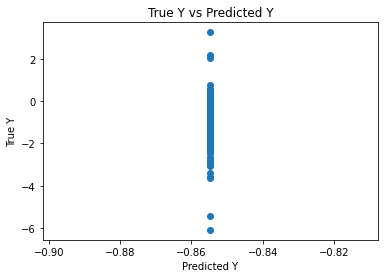

In [ ]:
plt.scatter(y_pred1,y_test1)
plt.title('True Y vs Predicted Y')
plt.xlabel('Predicted Y')
plt.ylabel('True Y')
plt.show()

In [ ]:
print(y_pred1.min())
print(y_pred1.mean())
print(y_pred1.max())
print(y_train1.mean())
#same as mean of training

-0.8546736785906432
-0.8546736785906432
-0.8546736785906432
-0.8546736785906432


In [ ]:
print(reg.coef_)
print(reg.coef_.shape) #325

[-0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0.
  0.  0. -0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.
  0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0.
  0.  0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0. -0.  0.  0.
  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0

###Performance

In [ ]:
y_pred1=reg.predict(X_test1)
mse=mean_squared_error(y_test1, y_pred1) #y true, y predict
print('MSE: %.3f' % mse)

MSE: 0.708


##Train model using cross-validation and test performance

In [ ]:
start_time=time.time()
lasso = LassoCV(cv=5,random_state=2021).fit(X_train1, y_train1) #also try 10
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) #11.9s
alpha_optim = lasso.alpha_ #0.032

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15293175212593724, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17468550530884386, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7656119111983344, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

Run time:--- 22.045 seconds ---


In [ ]:
importance = np.abs(lasso.coef_)
feature_names = np.array(X_train1.columns)

In [ ]:
count = 0
for i in importance :
    if i > 0 :
        count = count + 1
count
#30 features selected

30

####Top features

In [ ]:
importance_sort=np.sort(importance, axis=None)[::-1]
importance_sort[0:30]

array([0.12928414, 0.1036143 , 0.09487779, 0.0890654 , 0.05289255,
       0.03062671, 0.02852552, 0.02742805, 0.0265402 , 0.02367226,
       0.01977799, 0.01691836, 0.01674643, 0.0166854 , 0.01659586,
       0.01657788, 0.01619795, 0.01601982, 0.01566255, 0.01424106,
       0.01164217, 0.00851982, 0.00833137, 0.00663945, 0.00533318,
       0.00411767, 0.00372321, 0.0018627 , 0.00183524, 0.00182076])

In [ ]:
ind_sort=np.argsort(importance, axis=None)[::-1]
top_feature=feature_names[ind_sort[0:30]] #descending
top_feature

array(['SymOnsetDelta', 'fvc_liters_ValueLast', 'slope_first_3_months',
       'OnsetDelta', 'BMI_slope', 'Basophils_ValueSd',
       'AbsoluteBasophilCount_ValueMax', 'Respiratory_Rate_sd',
       'Chloride_ValueMin', 'fvc_liters_ValueStd', 'Neutrophils_TestNum',
       'Chloride_ValueSd', 'Potassium_ValueMin', 'Pulse_sd',
       'Basophils_ValueMax', 'Bicarbonate_ValueAve', 'BMI_last',
       'Phosphorus_ValueMin', 'Temperature_sd', 'Lymphocytes_ValueAve',
       'Temperature_max', 'Glucose_ValueMin', 'Temperature_nmeas',
       'Phosphorus_ValueAve', 'Vital_Signs_Delta_last', 'Pulse_min',
       'Respiratory_Rate_min', 'WhiteBloodCellWBC_ValueAve',
       'ALSFRS_Total_3_month', 'BilirubinTotal_ValueMin'], dtype=object)

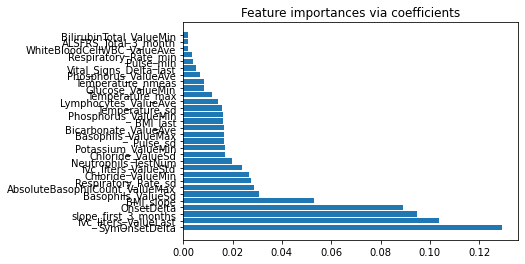

In [ ]:
plt.barh(width=importance_sort[0:30], y=top_feature) #plt.bar(height=,x=)
plt.title("Feature importances via coefficients")
#plt.xticks(rotation=90)
plt.show()

###Performance

In [ ]:
y_pred1=lasso.predict(X_test1)
mse=mean_squared_error(y_test1, y_pred1) #y true, y predict
print('MSE: %.3f' % mse)
#cv=5, 0.598
#cv=10, 0.596

MSE: 0.596


In [ ]:
# calculate Pearson's correlation
corr, _ = pearsonr(y_test1, y_pred1)
print('Pearsons correlation: %.3f' % corr)
#cv=5,r=0.406
#cv=10, r=0.404

Pearsons correlation: 0.404


###Train use train+test and predict in validation

In [ ]:
lasso = Lasso(alpha=alpha_optim,random_state=2021)
lasso.fit(X, y)
y_pred=lasso.predict(X_valid1)
mse=mean_squared_error(y_valid1, y_pred) #y true, y predict
print('MSE: %.3f' % mse)
#0.814
# calculate Pearson's correlation
corr, _ = pearsonr(y_valid1, y_pred)
print('Pearsons correlation: %.3f' % corr)
#0.360

MSE: 0.814
Pearsons correlation: 0.360


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


##Use Feature Selection

In [ ]:
start_time=time.time()
fit = SelectFdr(f_regression, alpha=0.05).fit(X_train1, y_train1) #0.012 s
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) 
X_train1_sel = fit.transform(X_train1) #Reduce X to the selected features.
print(X_train1_sel.shape) #47
X_train1_new=fit.inverse_transform(X_train1_sel) #Reverse the transformation operation.
X_train1_new.shape

Run time:--- 0.014 seconds ---
(1710, 47)


(1710, 325)

In [ ]:
start_time=time.time()
lasso = LassoCV(cv=5,random_state=2021).fit(X_train1_new, y_train1) #also try 10
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) #1.5s
alpha_optim = lasso.alpha_ #0.005

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3473111563639577, tolerance: 0.1330055318635104
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8664069908031706, tolerance: 0.1330055318635104
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1062807682928906, tolerance: 0.1330055318635104
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1382

Run time:--- 1.603 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9189305925365261, tolerance: 0.1267582856728515
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.948028160584272, tolerance: 0.1267582856728515
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9550258865842807, tolerance: 0.1267582856728515
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.96499

In [ ]:
y_pred1=lasso.predict(X_test1)
mse=mean_squared_error(y_test1, y_pred1) #y true, y predict
print('MSE: %.3f' % mse) #0.598
corr, _ = pearsonr(y_test1, y_pred1)
print('Pearsons correlation: %.3f' % corr) #0.394

MSE: 0.598
Pearsons correlation: 0.394


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LassoCV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


###Performance

In [ ]:
lasso = Lasso(alpha=alpha_optim,random_state=2021)
lasso.fit(X, y)
y_pred=lasso.predict(X_valid1)
mse=mean_squared_error(y_valid1, y_pred) #y true, y predict
print('MSE: %.3f' % mse)
#0.810
# calculate Pearson's correlation
corr, _ = pearsonr(y_valid1, y_pred)
print('Pearsons correlation: %.3f' % corr)
#0.359

MSE: 0.810
Pearsons correlation: 0.359


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


###Top features

In [ ]:
importance = np.abs(lasso.coef_)
count = 0
for i in importance :
    if i > 0 :
        count = count + 1
print(count) #28
importance_sort=np.sort(importance, axis=None)[::-1]
ind_sort=np.argsort(importance, axis=None)[::-1]
top_feature=feature_names[ind_sort[0:count]] #descending
top_feature

28


array(['SymOnsetDelta', 'Chloride_ValueMin', 'OnsetDelta',
       'Chloride_ValueAve', 'slope_first_3_months', 'site_onset1',
       'BMI_slope', 'BMI_last', 'SymSpeech', 'fvc_liters_ValueLast',
       'Basophils_ValueSd', 'fvc_liters_ValueMeanSquare',
       'Bicarbonate_ValueAve', 'fvc_liters_ValueStd',
       'Neutrophils_TestNum', 'Weight_kg_min', 'Respiratory_Rate_min',
       'ALSFRS_Total_3_month', 'BloodUreaNitrogenBUN_TestNum', 'Age',
       'Platelets_ValueAve', 'Phosphorus_ValueMin',
       'AbsoluteBasophilCount_ValueMax', 'Basophils_ValueMax',
       'Phosphorus_ValueAve', 'ALTSGPT_TestNum',
       'AbsoluteBasophilCount_ValueAve', 'AbsoluteBasophilCount_ValueSd'],
      dtype=object)

##Specify a range of alphas

In [ ]:
alphas = np.logspace(-5, 1, 60)
lasso = LassoCV(cv=10,random_state=2021,alphas=alphas).fit(X_train1, y_train1)

In [ ]:
y_pred1=lasso.predict(X_test1)
mse=mean_squared_error(y_test1, y_pred1) #y true, y predict
print('MSE: %.3f' % mse)
#cv=10, 0.595

MSE: 0.595


In [ ]:
# calculate Pearson's correlation
corr, _ = pearsonr(y_test1, y_pred1)
print('Pearsons correlation: %.3f' % corr)
#cv=10,r=0.403

Pearsons correlation: 0.403


##Plot Performance vs alpha

In [ ]:
alphas = np.logspace(-5, 1, 60)
lasso = Lasso(alpha=1,random_state=2021) #default=0.5
train_r2 = list()
test_r2 = list()
train_errors = list()
test_errors = list()
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train1, y_train1)
    y_pred_train=lasso.predict(X_train1)
    train_errors.append(mean_squared_error(y_train1, y_pred_train).round(4))
    train_r2.append(lasso.score(X_train1,y_train1))
    y_pred_test=lasso.predict(X_test1)
    test_errors.append(mean_squared_error(y_test1, y_pred_test).round(4))
    test_r2.append(lasso.score(X_test1,y_test1))

i_alpha_optim = np.argmin(test_errors)
alpha_optim = alphas[i_alpha_optim]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.380e+02, tolerance: 1.563e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.344e+02, tolerance: 1.563e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

0.022695105366946706


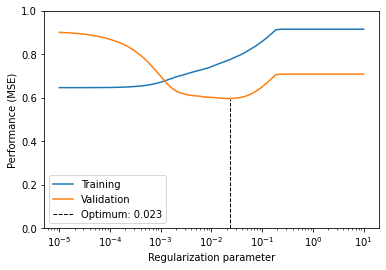

In [ ]:
print(alpha_optim)
# Plot results functions
plt.semilogx(alphas, train_errors, label="Training")
plt.semilogx(alphas, test_errors, label="Validation")
plt.ylim([0, 1])
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.min(test_errors),
    color="k",
    linewidth=1, linestyle="dashed",
    label="Optimum: %.3f" % alpha_optim,
)
plt.legend(loc="best")
plt.xlabel("Regularization parameter")
plt.ylabel("Performance (MSE)")
plt.show()

0.022695105366946706


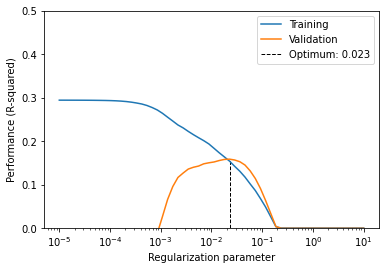

In [ ]:
i_alpha_optim = np.argmax(test_r2)
alpha_optim = alphas[i_alpha_optim]
print(alpha_optim)
# Plot results functions
plt.semilogx(alphas, train_r2, label="Training")
plt.semilogx(alphas, test_r2, label="Validation")
plt.ylim([0, 0.5])
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_r2),
    color="k",
    linewidth=1, linestyle="dashed",
    label="Optimum: %.3f" % alpha_optim,
)
plt.legend(loc="best")
plt.xlabel("Regularization parameter")
plt.ylabel("Performance (R-squared)")
plt.show()

##Look at Y Pred

In [ ]:
#add prediction in train and test
y_pred_trn=lasso.predict(X_train1)
y_pred_tst=lasso.predict(X_test1)
y_pred_out=np.append(y_pred_trn,y_pred_tst)
y_pred_out=np.append(y_pred_out,y_pred)
np.shape(y_pred_out)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(3191,)

In [ ]:
all=train1
all=all.append(test1)
all=all.append(valid1)
yall=y.append(y_valid1)
print(all.shape)
print(yall.shape) 

(3191, 327)
(3191,)


In [ ]:
#data_y=pd.DataFrame({'subject_id':valid1['subject_id'],'y_true':y_valid1,'y_pred_lasso':y_pred})
data_y=pd.DataFrame({'subject_id':all['subject_id'],'y_true':yall,'y_pred_lasso':y_pred_out})
#data_y.to_csv("/content/drive/MyDrive/ML Project/Output/Lasso_output.csv",index=False)

In [ ]:
data_y.drop(columns='subject_id').describe()

,y_true,y_pred_lasso
count,3191.000000,3191.000000
mean,-0.857436,-0.850287
std,0.944191,0.268672
min,-8.056765,-1.976700
25%,-1.257713,-1.022970
50%,-0.691742,-0.856365
75%,-0.252065,-0.678113
max,7.609167,0.974256


##Calculate Performance among <= 3SD in Y true

In [ ]:
sd_ytrue=np.std(data_y['y_true'])
data_y1=data_y.loc[(data_y['y_true']<=3*sd_ytrue) & (data_y['y_true']>=-3*sd_ytrue)]
#print(data_y1.describe())
y_true=data_y1['y_true'].to_numpy()
y_pred_lasso=data_y1['y_pred_lasso'].to_numpy()

mse=mean_squared_error(y_true, y_pred_lasso) #y true, y predict
print('MSE: %.3f' % mse)
#0.446
# calculate Pearson's correlation
corr, _ = pearsonr(y_true, y_pred_lasso)
print('Pearsons correlation: %.3f' % corr)
#0.394
corr, _ = spearmanr(y_true, y_pred_lasso)
print('Spearmans correlation: %.3f' % corr)
#0.429

MSE: 0.446
Pearsons correlation: 0.394
Spearmans correlation: 0.429


In [ ]:
#check classification
#cut off -1.1, -0.5
filters = [
   (data_y.y_true <-1.1),
   (data_y.y_true <-0.5),
   (data_y.y_true >= -0.5)
]
values = ["fast", "medium", "slow"]
data_y['y_true_class']=np.select(filters,values)
data_y['y_true_class'].value_counts() #slow: 421, fast 331, medium 301

slow      421
fast      331
medium    301
Name: y_true_class, dtype: int64

In [ ]:
filters = [
   (data_y.y_pred_lasso <-1.1),
   (data_y.y_pred_lasso <-0.5),
   (data_y.y_pred_lasso >= -0.5)
]
values = ["fast", "medium", "slow"]
data_y['y_pred_class']=np.select(filters,values)
data_y['y_pred_class'].value_counts() #slow: 421, fast 331, medium 301

medium    777
fast      172
slow      104
Name: y_pred_class, dtype: int64

In [ ]:
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'])

y_pred_class,fast,medium,slow
y_true_class,,,
fast,93,230,8
medium,48,232,21
slow,31,315,75


In [ ]:
#percentage
pd.crosstab(data_y['y_true_class'],data_y['y_pred_class'],normalize='index')

y_pred_class,fast,medium,slow
y_true_class,,,
fast,0.280967,0.694864,0.024169
medium,0.159468,0.770764,0.069767
slow,0.073634,0.748219,0.178147


#Elastic Net

##Elastic Net CV

In [ ]:
start_time=time.time()
enet = ElasticNetCV(cv=5,random_state=2021).fit(X_train1, y_train1) 
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) #11.0s
alpha_optim=enet.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28323690977015303, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34689533100436165, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45590098687387126, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

Run time:--- 12.260 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.323410948759715, tolerance: 0.1267582856728515
  positive,


In [ ]:
print(enet.alpha_) #0.059
enet.get_params()
#l1_ratio 0.5 default

0.05883177390481182


{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': 2021,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

####Top features

In [ ]:
coef_ = enet.coef_
count = 0
for i in coef_ :
    if i > 0 :
        count = count + 1
count
#21 features selected

21

In [ ]:
importance = np.abs(enet.coef_)
feature_names = np.array(X_train1.columns)
importance_sort=np.sort(importance, axis=None)[::-1]
ind_sort=np.argsort(importance, axis=None)[::-1]
top_feature=feature_names[ind_sort[0:count]] #descending
top_feature

array(['SymOnsetDelta', 'fvc_liters_ValueLast', 'slope_first_3_months',
       'OnsetDelta', 'BMI_slope', 'Basophils_ValueSd',
       'AbsoluteBasophilCount_ValueMax', 'Respiratory_Rate_sd',
       'Chloride_ValueMin', 'fvc_liters_ValueStd', 'Neutrophils_TestNum',
       'Chloride_ValueSd', 'Potassium_ValueMin', 'Bicarbonate_ValueAve',
       'Pulse_sd', 'BMI_last', 'Temperature_sd', 'Phosphorus_ValueMin',
       'Basophils_ValueMax', 'Lymphocytes_ValueAve', 'Temperature_max'],
      dtype=object)

###Performance

In [ ]:
y_pred1=enet.predict(X_test1)
mse=mean_squared_error(y_test1, y_pred1) #y true, y predict
print('MSE: %.3f' % mse)
#cv=5, 0.598

MSE: 0.598


In [ ]:
# calculate Pearson's correlation
corr, _ = pearsonr(y_test1, y_pred1)
print('Pearsons correlation: %.3f' % corr)
#cv=5,r=0.406

Pearsons correlation: 0.406


In [ ]:
y_pred=enet.predict(X_valid1)
mse=mean_squared_error(y_valid1, y_pred) #y true, y predict
print('MSE: %.3f' % mse)
#Lasso cv=5, 0.82, Enet 0.821

MSE: 0.821


In [ ]:
# calculate Pearson's correlation
corr, _ = pearsonr(y_valid1, y_pred)
print('Pearsons correlation: %.3f' % corr)
#Lasso cv=5, 0.349, Enet 0.347

Pearsons correlation: 0.347


In [ ]:
enet = ElasticNet(alpha=alpha_optim,random_state=2021)
enet.fit(X, y)
y_pred=enet.predict(X_valid1)
mse=mean_squared_error(y_valid1, y_pred) #y true, y predict
print('MSE: %.3f' % mse)
#0.813
# calculate Pearson's correlation
corr, _ = pearsonr(y_valid1, y_pred)
print('Pearsons correlation: %.3f' % corr)
#0.364

MSE: 0.813
Pearsons correlation: 0.364


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#Use KNN imputed data

##Import KNN imputed data

In [ ]:
train2 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/knn imputer/training_impute_knn_norm.csv")
test2 =  pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/knn imputer/testing_impute_knn_norm.csv") 
valid2 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/knn imputer/validation_impute_knn_norm.csv") 

In [ ]:
print(train2.shape)
print(train2.head())
print(test2.shape)
print(test2.head())
print(valid2.shape)
print(valid2.head())

(1710, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      553099                 -0.887366  ...            0            0
1        8471                 -0.954460  ...            1            0
2      534458                 -0.521771  ...            0            0
3      225766                 -0.454279  ...            1            0
4      161271                 -0.457694  ...            0            0

[5 rows x 327 columns]
(428, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      312890                  0.313780  ...            1            0
1       38898                 -0.187881  ...            0            0
2      441498                  0.127885  ...            0            0
3      701123                 -1.014556  ...            1            0
4      230653                 -0.111490  ...            0            0

[5 rows x 327 columns]
(1053, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_o

##Create training and testing matrices

In [ ]:
X_train2=train2.iloc[:,2:]
y_train2=train2.iloc[:,1]
print(X_train2.shape)
print(y_train2.shape)

(1710, 325)
(1710,)


In [ ]:
X_test2=test2.iloc[:,2:]
y_test2=test2.iloc[:,1]
print(X_test1.shape)
print(y_test1.shape)

(428, 325)
(428,)


In [ ]:
y_test2.describe()

count    428.000000
mean      -0.832762
std        0.842031
min       -6.087333
25%       -1.222548
50%       -0.715107
75%       -0.303395
max        3.261071
Name: slope_following_9_months, dtype: float64

In [ ]:
X_test2.iloc[:,275]=0 #NaN convert back to 0

In [ ]:
X_valid2=valid2.iloc[:,2:]
y_valid2=valid2.iloc[:,1]
print(X_valid2.shape)
print(y_valid2.shape)

(1053, 325)
(1053,)


In [ ]:
X=np.vstack((X_train2,X_test2))
y=y_train2.append(y_test2)
print(X.shape)
print(y.shape) 

(2138, 325)
(2138,)


##Train Lasso

In [ ]:
alphas = np.logspace(-5, 1, 60)
start_time=time.time()
lasso = LassoCV(cv=None,random_state=2021,alphas=alphas).fit(X_train2, y_train2) #None->5 fold default
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) 
print(lasso.alpha_) 
alpha_optim=lasso.alpha_
coef_ = lasso.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17980906979573774, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2223059501473017, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16227418621951983, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6

Run time:--- 16.699 seconds ---
0.02868316813342012


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.2456023405058, tolerance: 0.1267582856728515
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.2848468560733, tolerance: 0.1267582856728515
  positive,


In [ ]:
# Estimate the coef_ on full data with optimal regularization parameter
lasso2 = Lasso(alpha=alpha_optim,random_state=2021) #default=0.5
lasso2=lasso2.fit(X_train2, y_train2)
coef_ = lasso2.coef_

In [ ]:
count = 0
for i in coef_ :
    if i > 0 :
        count = count + 1
count

21

###Performance on testing

In [ ]:
y_pred2=lasso.predict(X_test2)
mse=mean_squared_error(y_test2, y_pred2) #y true, y predict
print('MSE: %.3f' % mse)
#no CV, 0.594

MSE: 0.594


In [ ]:
# calculate Pearson's correlation
corr, _ = pearsonr(y_test2, y_pred2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.411


###Top features

In [ ]:
importance = np.abs(lasso2.coef_)
feature_names = np.array(X_train2.columns)
importance_sort=np.sort(importance, axis=None)[::-1]

ind_sort=np.argsort(importance, axis=None)[::-1]
top_feature=feature_names[ind_sort[0:30]] #descending
top_feature

array(['SymOnsetDelta', 'fvc_liters_ValueLast', 'slope_first_3_months',
       'OnsetDelta', 'BMI_slope', 'Respiratory_Rate_sd',
       'fvc_liters_ValueStd', 'Chloride_ValueSd', 'Potassium_ValueMin',
       'Chloride_ValueMin', 'Glucose_ValueMin', 'Neutrophils_TestNum',
       'Basophils_ValueMax', 'Basophils_ValueSd', 'BMI_last',
       'Phosphorus_ValueMin', 'Pulse_sd', 'Temperature_sd',
       'Bicarbonate_ValueAve', 'Temperature_max',
       'AbsoluteBasophilCount_ValueSd', 'Lymphocytes_ValueAve',
       'Vital_Signs_Delta_last', 'ALSFRS_Total_3_month',
       'Respiratory_Rate_min', 'Phosphorus_ValueAve',
       'BilirubinTotal_ValueMin', 'ASTSGOT_ValueMin',
       'Platelets_ValueMin', 'Glucose_TestNum'], dtype=object)

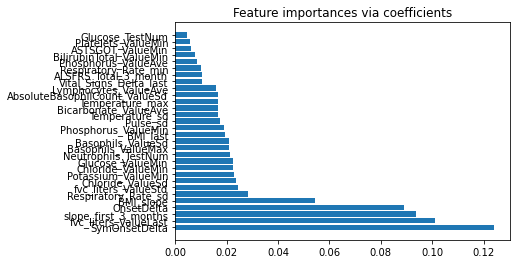

In [ ]:
plt.barh(width=importance_sort[0:30], y=top_feature) #plt.bar(height=,x=)
plt.title("Feature importances via coefficients")
#plt.xticks(rotation=90)
plt.show()

##Use Feature Selection

In [ ]:
start_time=time.time()
fit = SelectFdr(f_regression, alpha=0.05).fit(X_train2, y_train2)
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) 
X_train2_sel = fit.transform(X_train2) #Reduce X to the selected features.
print(X_train2_sel.shape) #51
X_train2_new=fit.inverse_transform(X_train2_sel) #Reverse the transformation operation.
X_train2_new.shape

Run time:--- 0.017 seconds ---
(1710, 51)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


(1710, 325)

In [ ]:
start_time=time.time()
lasso = LassoCV(cv=5,random_state=2021).fit(X_train2_new, y_train2) #also try 10
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) #1.7s
alpha_optim=lasso.alpha_ #0.013

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1531329799897776, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15335259906191823, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14947893094267783, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0

Run time:--- 1.766 seconds ---


In [ ]:
y_pred2=lasso.predict(X_test2)
mse=mean_squared_error(y_test2, y_pred2) #y true, y predict
print('MSE: %.3f' % mse) #0.589
corr, _ = pearsonr(y_test2, y_pred2)
print('Pearsons correlation: %.3f' % corr) #0.413

MSE: 0.589
Pearsons correlation: 0.413


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LassoCV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_pred=lasso.predict(X_valid2)
mse=mean_squared_error(y_valid2, y_pred) #y true, y predict
print('MSE: %.3f' % mse) #0.814
corr, _ = pearsonr(y_valid2, y_pred)
print('Pearsons correlation: %.3f' % corr) #0.352

MSE: 0.814
Pearsons correlation: 0.352


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LassoCV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


###Performance

In [ ]:
lasso = Lasso(alpha=alpha_optim,random_state=2021)
lasso.fit(X, y)
y_pred=lasso.predict(X_valid2)
mse=mean_squared_error(y_valid2, y_pred) #y true, y predict
print('MSE: %.3f' % mse)
#0.808
# calculate Pearson's correlation
corr, _ = pearsonr(y_valid2, y_pred)
print('Pearsons correlation: %.3f' % corr)
#0.360

MSE: 0.808
Pearsons correlation: 0.360


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


###Top features

In [ ]:
importance = np.abs(lasso.coef_)
count = 0
for i in importance :
    if i > 0 :
        count = count + 1
print(count) #26
importance_sort=np.sort(importance, axis=None)[::-1]
ind_sort=np.argsort(importance, axis=None)[::-1]
top_feature=feature_names[ind_sort[0:count]] #descending
top_feature

26


array(['SymOnsetDelta', 'OnsetDelta', 'slope_first_3_months',
       'fvc_liters_ValueLast', 'BMI_slope', 'Chloride_ValueSd',
       'Glucose_ValueMin', 'fvc_liters_ValueStd', 'Bicarbonate_ValueAve',
       'Respiratory_Rate_min', 'Basophils_ValueMax', 'Temperature_max',
       'Basophils_ValueSd', 'Neutrophils_TestNum', 'BMI_last',
       'Phosphorus_ValueMin', 'ALSFRS_Total_3_month',
       'Platelets_ValueMin', 'Chloride_ValueMin', 'site_onset1',
       'AbsoluteBasophilCount_ValueSd', 'Age', 'Phosphorus_ValueAve',
       'AbsoluteBasophilCount_ValueMax', 'fvc_liters_ValueMeanSquare',
       'BloodUreaNitrogenBUN_TestNum'], dtype=object)

##Train Elastic Net

###Elastic Net CV

In [ ]:
start_time=time.time()
enet = ElasticNetCV(cv=5,random_state=2021).fit(X_train2, y_train2) 
print("Run time:--- %.3f seconds ---" % (time.time() - start_time)) 
alpha_optim=enet.alpha_
coef_=enet.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2942498635222819, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35920632945249054, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4241499869527843, tolerance: 0.12633091832671978
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.

Run time:--- 13.269 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.049822997537035, tolerance: 0.1267582856728515
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.87026838188774, tolerance: 0.1267582856728515
  positive,


In [ ]:
enet = ElasticNet(alpha=alpha_optim,random_state=2021)
enet.fit(X, y)
y_pred=enet.predict(X_valid2)
mse=mean_squared_error(y_valid2, y_pred) #y true, y predict
print('MSE: %.3f' % mse)
#0.812
# calculate Pearson's correlation
corr, _ = pearsonr(y_valid2, y_pred)
print('Pearsons correlation: %.3f' % corr)
#0.364

MSE: 0.812
Pearsons correlation: 0.364


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
count = 0
for i in coef_ :
    if i > 0 :
        count = count + 1
count

21

###Top features

In [ ]:
importance = np.abs(coef_)
feature_names = np.array(X_train2.columns)
importance_sort=np.sort(importance, axis=None)[::-1]

ind_sort=np.argsort(importance, axis=None)[::-1]
top_feature=feature_names[ind_sort[0:count]] #descending
top_feature

array(['SymOnsetDelta', 'fvc_liters_ValueLast', 'slope_first_3_months',
       'OnsetDelta', 'BMI_slope', 'Respiratory_Rate_sd',
       'fvc_liters_ValueStd', 'Chloride_ValueMin', 'Chloride_ValueSd',
       'Potassium_ValueMin', 'Glucose_ValueMin', 'Neutrophils_TestNum',
       'Basophils_ValueSd', 'Basophils_ValueMax', 'BMI_last',
       'Phosphorus_ValueMin', 'Bicarbonate_ValueAve', 'Temperature_max',
       'Temperature_sd', 'Pulse_sd', 'Lymphocytes_ValueAve'], dtype=object)

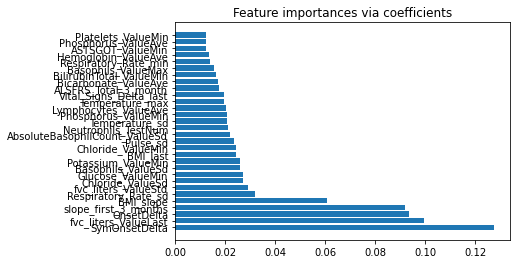

In [ ]:
plt.barh(width=importance_sort[0:30], y=top_feature) #plt.bar(height=,x=)
plt.title("Feature importances via coefficients")
#plt.xticks(rotation=90)
plt.show()

Different feature ranking by two methods: same features up to 19th variable, most similar just different rank from 19-30

In [ ]:
def evaluation_metrics(y_test, y_pred,X_train):
  R2 = r2_score(y_test, y_pred).round(4)
  Adjusted_R2 = (1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)).round(4)
  MAE = mean_absolute_error(y_test, y_pred).round(4)
  MSE = mean_squared_error(y_test, y_pred).round(4)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred)).round(4)
  Pearson_Correlation = pearsonr(y_test, y_pred)[0].round(4)

  evaluatin_table = pd.DataFrame.from_dict({"R^2": R2,
                                            "Adjusted R^2": Adjusted_R2,
                                            "MAE": MAE,
                                            "MSE": MSE,
                                            "RMSE": RMSE,
                                            "Pearson_Correlation": [Pearson_Correlation],
                                            }, 
  )

  return evaluatin_table

In [ ]:
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation")
evaluatin_table

Median imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1582,-2.5242,0.5327,0.5955,0.7717,0.4015


In [ ]:
evaluatin_table = evaluation_metrics(y_test2, y_pred2, X_train2)
print("KNN imputation")
evaluatin_table

KNN imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1606,-2.5138,0.5365,0.5937,0.7705,0.4069
